<a href="https://colab.research.google.com/github/Salinas-Javier/IA/blob/main/Sales_Forecasting/sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import os
import platform

In [92]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [93]:
if os.access('features.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/Salinas-Javier/IA/main/Sales_forecasting/features.csv
    else:
        !wget features.csv https://raw.githubusercontent.com/Salinas-Javier/IA/main/Sales_forecasting/features.csv

In [94]:
if os.access('stores.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/Salinas-Javier/IA/main/Sales_forecasting/stores.csv
    else:
        !wget stores.csv https://raw.githubusercontent.com/Salinas-Javier/IA/main/Sales_forecasting/stores.csv

In [95]:
if os.access('test.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/Salinas-Javier/IA/main/Sales_forecasting/test.csv
    else:
        !wget test.csv https://raw.githubusercontent.com/Salinas-Javier/IA/main/Sales_forecasting/test.csv

In [96]:
if os.access('train.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/Salinas-Javier/IA/main/Sales_forecasting/train.csv
    else:
        !wget train.csv https://raw.githubusercontent.com/Salinas-Javier/IA/main/Sales_forecasting/train.csv

Reading the data from the csv file

In [97]:
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
stores_df = pd.read_csv('stores.csv')
test_df = pd.read_csv('test.csv')

In [98]:
train_df.head()


Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [100]:
train_df.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [101]:
train_df.isnull()

Store   Dept   Date  Weekly_Sales  IsHoliday
0       False  False  False         False      False
1       False  False  False         False      False
2       False  False  False         False      False
3       False  False  False         False      False
4       False  False  False         False      False
...       ...    ...    ...           ...        ...
421565  False  False  False         False      False
421566  False  False  False         False      False
421567  False  False  False         False      False
421568  False  False  False         False      False
421569  False  False  False         False      False

[421570 rows x 5 columns]

In [102]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [103]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [104]:
stores_df.head(10)

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
5      6    A  202505
6      7    B   70713
7      8    A  155078
8      9    B  125833
9     10    B  126512

Visualizing the type of the store along whit their percentage

value_counts()[:10]: Esto toma las primeras 10 filas (es decir, los 10 valores únicos más frecuentes) de la serie devuelta por value_counts().
.index: Luego, se accede al índice de estas 10 filas, lo que devuelve una serie que contiene los 10 valores únicos más frecuentes como índices.
En resumen, value_counts()[:10].index te dará los índices (es decir, los valores únicos más frecuentes) de las primeras 10 filas de la serie devuelta por value_counts(). Esto puede ser útil para obtener los valores más comunes en una serie de datos.

In [105]:
labels = stores_df["Type"].value_counts()[:10].index
values = stores_df["Type"].value_counts()[:10].values

colors = stores_df["Type"]

fig = go.Figure(data = [go.Pie(labels= labels, values = values, textinfo= "label+percent", marker = dict(colors = colors))])
fig.show()


Type a has the max number of store
Since features and stores have "Store" as a common column let´s merge the data

El código dataset = features_df.merge(stores_df, how='inner', on='Store') está realizando una operación de fusión (merge) entre dos DataFrames features_df y stores_df utilizando la columna común 'Store'.

Aquí está lo que está sucediendo en este código:

features_df y stores_df son dos DataFrames que tienen una columna en común llamada 'Store'.
El parámetro how='inner' indica que quieres hacer una fusión interna, lo que significa que solo se incluirán las filas donde el valor de la columna 'Store' coincida en ambos DataFrames.
El parámetro on='Store' especifica que la fusión se realizará en base a la columna 'Store'.

In [106]:
# Using the merge funtion to merge ans we are merging along the common column named store
dataset = features_df.merge(stores_df, how = 'inner', on = 'Store')
dataset.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type  \
0        NaN        NaN        NaN  211.096358         8.106      False    A   
1        NaN        NaN        NaN  211.242170         8.106       True    A   
2        NaN        NaN        NaN  211.289143         8.106      False    A   
3        NaN        NaN        NaN  211.319643         8.106      False    A   
4        NaN        NaN        NaN  211.350143         8.106      False    A   

     Size  
0  151315  
1  151315  
2  151315  
3  151315  
4  151315

In [107]:
dataset.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


Since the date in the above dataset is string value we can convert them into datetime using the datetime

In [109]:
dataset.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  \
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000   
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821   
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259   
min      -179.260000      0.220000    -185.170000   126.064000      3.684000   
25%         6.600000    304.687500    1440.827500   132.364839      6.634000   
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000   
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000   
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000   

                Size  
count    8190.000000  
mean   130287.600000  
std     63115.971429  
min     34875.000000  
25%     70713.000000  
50%    126512.000000  
75%    202307.000000  
max    219622.000000

In [110]:
labels = dataset["Type"].value_counts()[:10].index
values = dataset["Type"].value_counts()[:10].values

colors = dataset["Type"]

fig = go.Figure(data = [go.Pie(labels= labels, values = values, textinfo= "label+percent", marker = dict(colors = colors))])
fig.show()

In [111]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [112]:
labels = train_df["Dept"].value_counts()[:10].index
values = train_df["Dept"].value_counts()[:10].values

colors = train_df["Dept"]

fig = go.Figure(data = [go.Pie(labels= labels, values = values, textinfo= "label+percent", marker = dict(colors = colors))])
fig.show()

In [113]:
labels = train_df["Store"].value_counts()[:10].index
values = train_df["Store"].value_counts()[:10].values

colors = train_df["Store"]

fig = go.Figure(data = [go.Pie(labels= labels, values = values, textinfo= "label+percent", marker = dict(colors = colors))])
fig.show()

In [114]:
labels = train_df["IsHoliday"].value_counts()[:10].index
values = train_df["IsHoliday"].value_counts()[:10].values

colors = train_df["IsHoliday"]

fig = go.Figure(data = [go.Pie(labels= labels, values = values, textinfo= "label+percent", marker = dict(colors = colors))])
fig.show()

In [115]:
test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

In [116]:
test_df.describe()

Store           Dept
count  115064.000000  115064.000000
mean       22.238207      44.339524
std        12.809930      30.656410
min         1.000000       1.000000
25%        11.000000      18.000000
50%        22.000000      37.000000
75%        33.000000      74.000000
max        45.000000      99.000000

In [117]:
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [118]:
dataset['Week'] = dataset.Date.dt.week
dataset['Year'] = dataset.Date.dt.year

<ipython-input-118-5298728615af>:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



In [119]:
dataset.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type    Size  \
0        NaN        NaN  211.096358         8.106      False    A  151315   
1        NaN        NaN  211.242170         8.106       True    A  151315   
2        NaN        NaN  211.289143         8.106      False    A  151315   
3        NaN        NaN  211.319643         8.106      False    A  151315   
4        NaN        NaN  211.350143         8.106      False    A  151315   

   Week  Year  
0     5  2010  
1     6  2010  
2     7  2010  
3     8  2010  
4     9  2010

In [120]:
#Mergin whit the train_df
train_merge = train_df.merge(dataset, how = 'inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop = True)

In [121]:
test_merge = test_df.merge(dataset, how = 'inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop = True)

In [122]:
def scatter(train_merge, column):
  plt.figure()
  plt.scatter(train_merge[column], train_merge['Weekly_Sales'])
  plt.ylabel('Weekly_Sales')
  plt.xlabel(column)

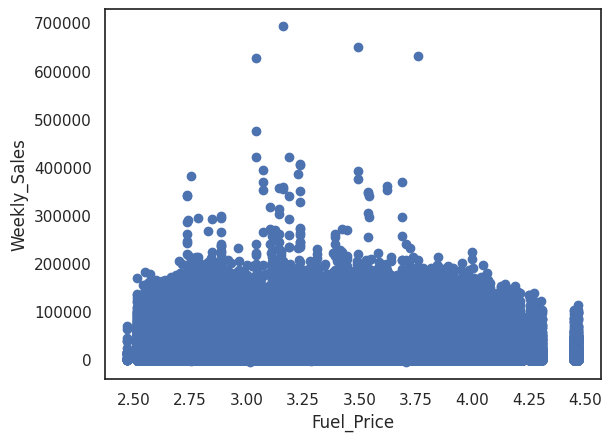

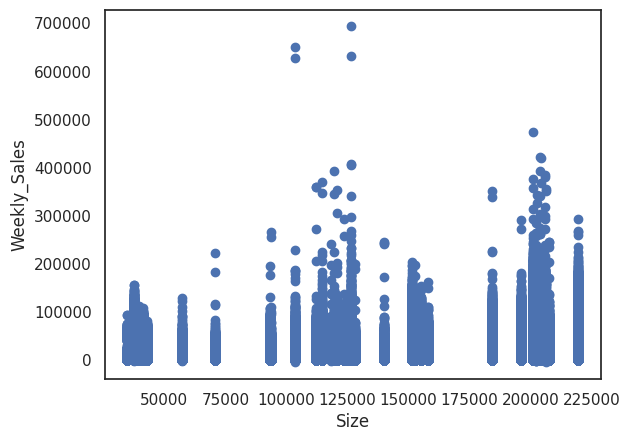

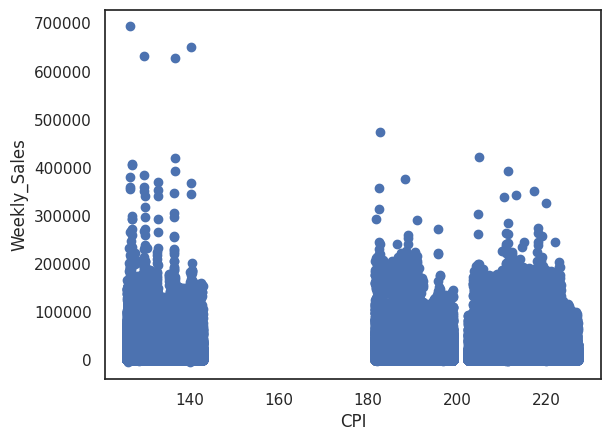

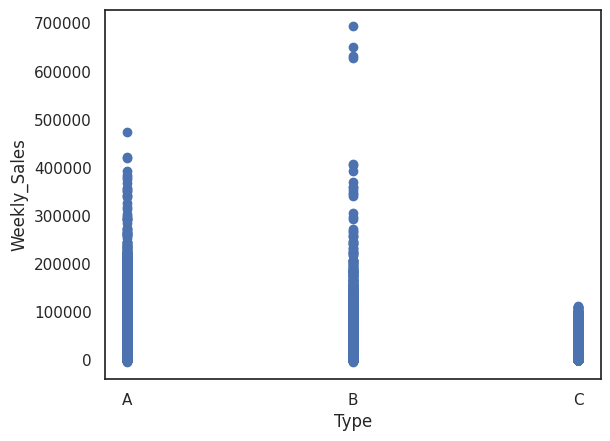

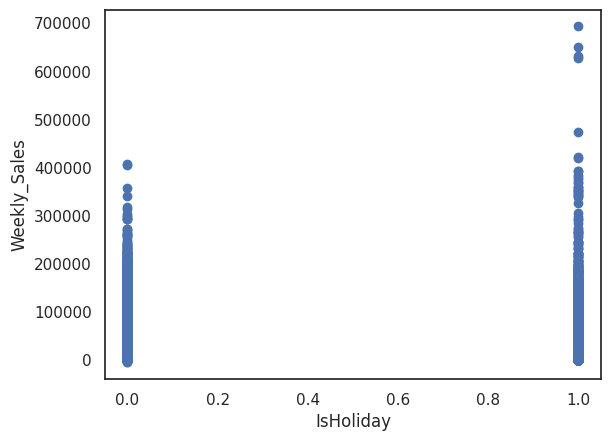

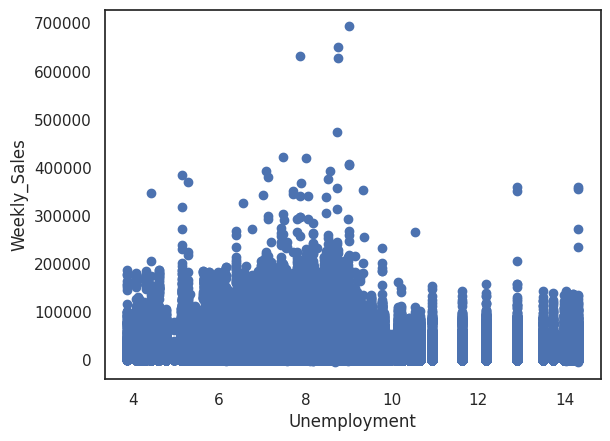

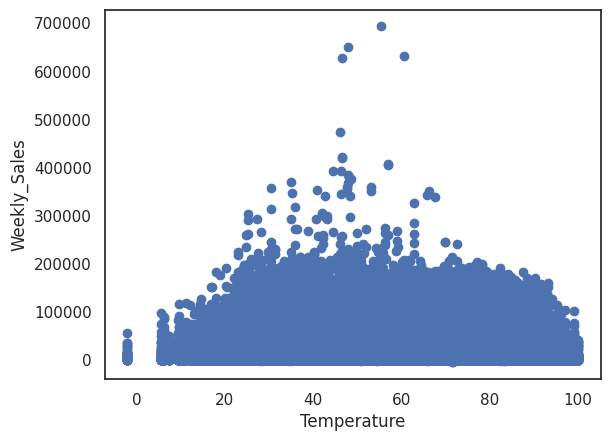

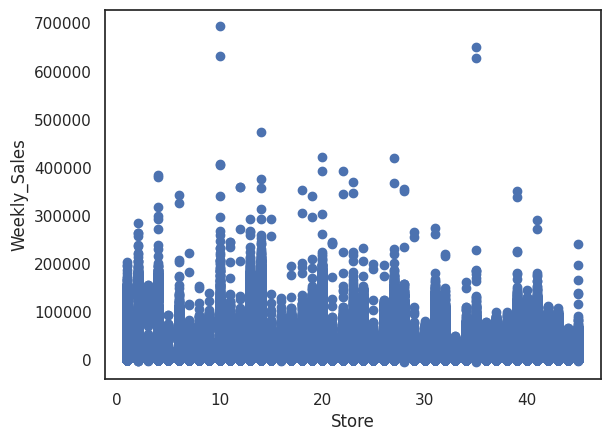

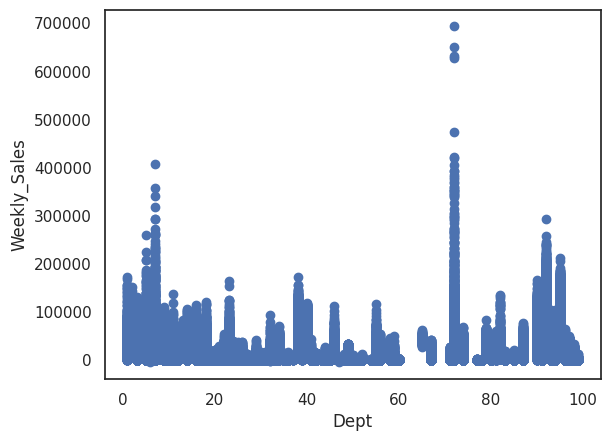

In [123]:
scatter(train_merge, 'Fuel_Price')
scatter(train_merge, 'Size')
scatter(train_merge, 'CPI')
scatter(train_merge, 'Type')
scatter(train_merge, 'IsHoliday')
scatter(train_merge, 'Unemployment')
scatter(train_merge, 'Temperature')
scatter(train_merge, 'Store')
scatter(train_merge, 'Dept')


correlation Matrix

let´s have a look at the Average Weekly Sales per year and find out if there is any ather hopliday peak sales that were not considered by IsHoliday filed



<Axes: xlabel='Week'>

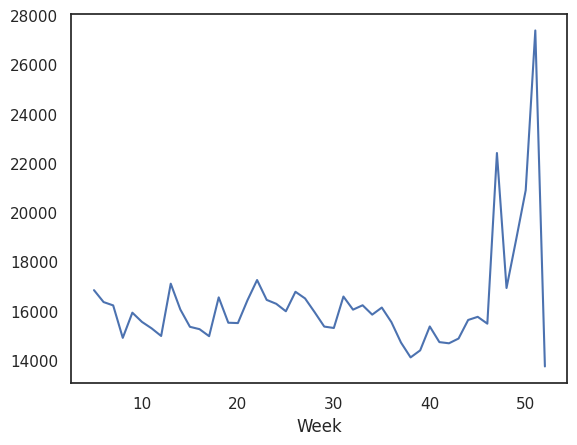

In [124]:
weekly_sales_2010 = train_merge[train_merge['Year']==2010]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x = weekly_sales_2010.index, y = weekly_sales_2010.values)


<Axes: xlabel='Week'>

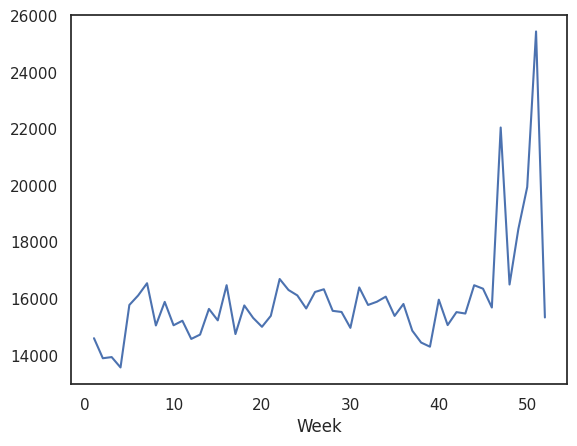

In [125]:
weekly_sales_2011 = train_merge[train_merge['Year']==2011]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x = weekly_sales_2011.index, y = weekly_sales_2011.values)

<Axes: xlabel='Week'>

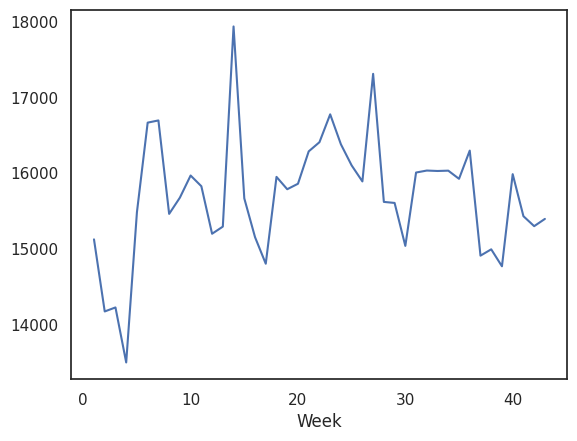

In [126]:
weekly_sales_2012 = train_merge[train_merge['Year']==2012]['Weekly_Sales'].groupby(train_merge['Week']).mean()
sns.lineplot(x = weekly_sales_2012.index, y = weekly_sales_2012.values)

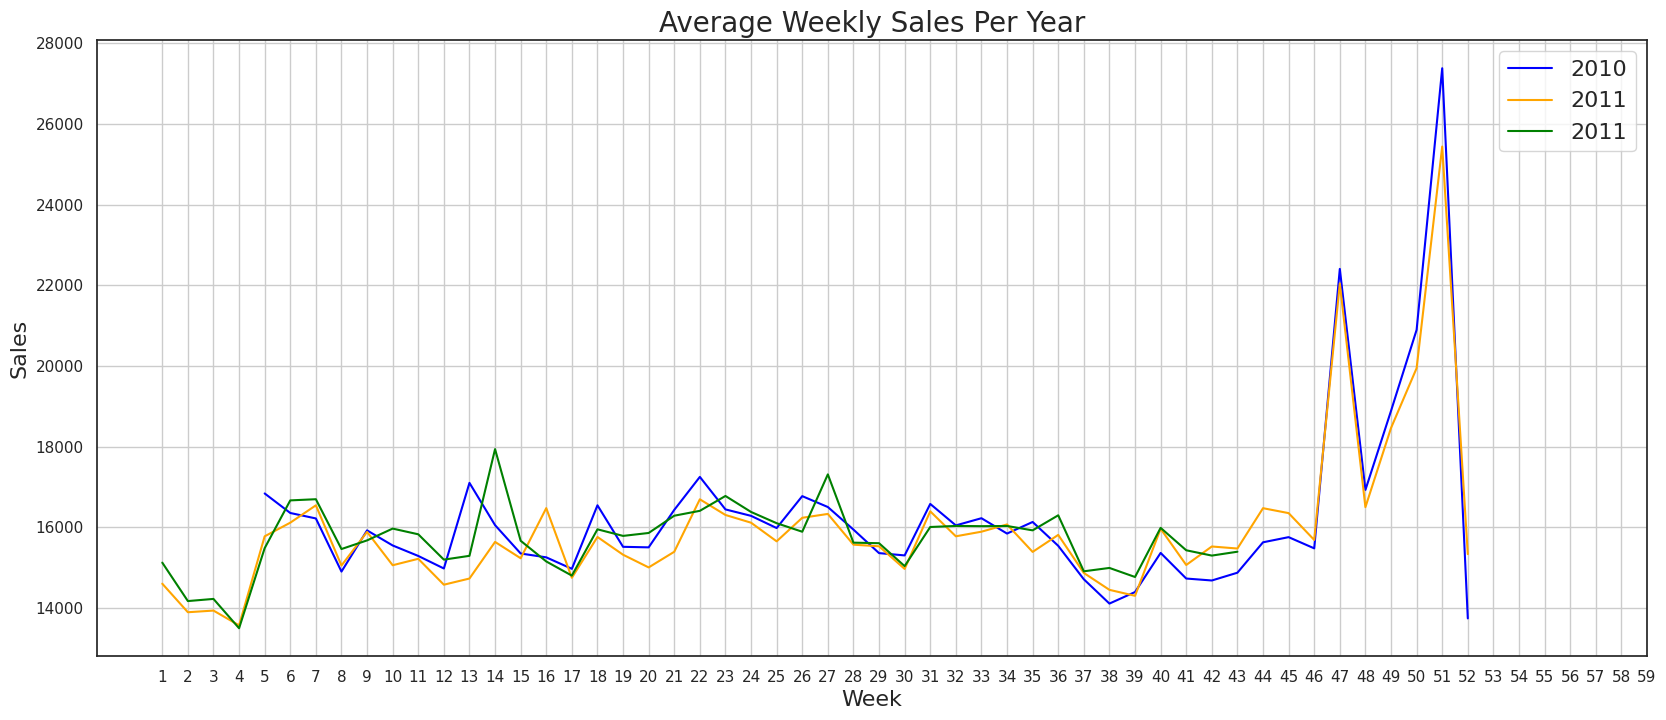

In [127]:
#Plotting the above three plot toggether
plt.figure(figsize = (20,8))
sns.lineplot(x = weekly_sales_2010.index, y= weekly_sales_2010.values, color='blue', label='2010')
sns.lineplot(x = weekly_sales_2011.index, y= weekly_sales_2011.values, color='orange', label='2011')
sns.lineplot(x = weekly_sales_2012.index, y= weekly_sales_2012.values, color='green', label='2011')
plt.grid()
plt.xticks(np.arange(1,60, step= 1))
plt.legend(loc = 'best', fontsize = 16)
plt.title('Average Weekly Sales Per Year', fontsize = 20)
plt.ylabel('Sales', fontsize = 16)
plt.xlabel('Week', fontsize = 16)
plt.show()


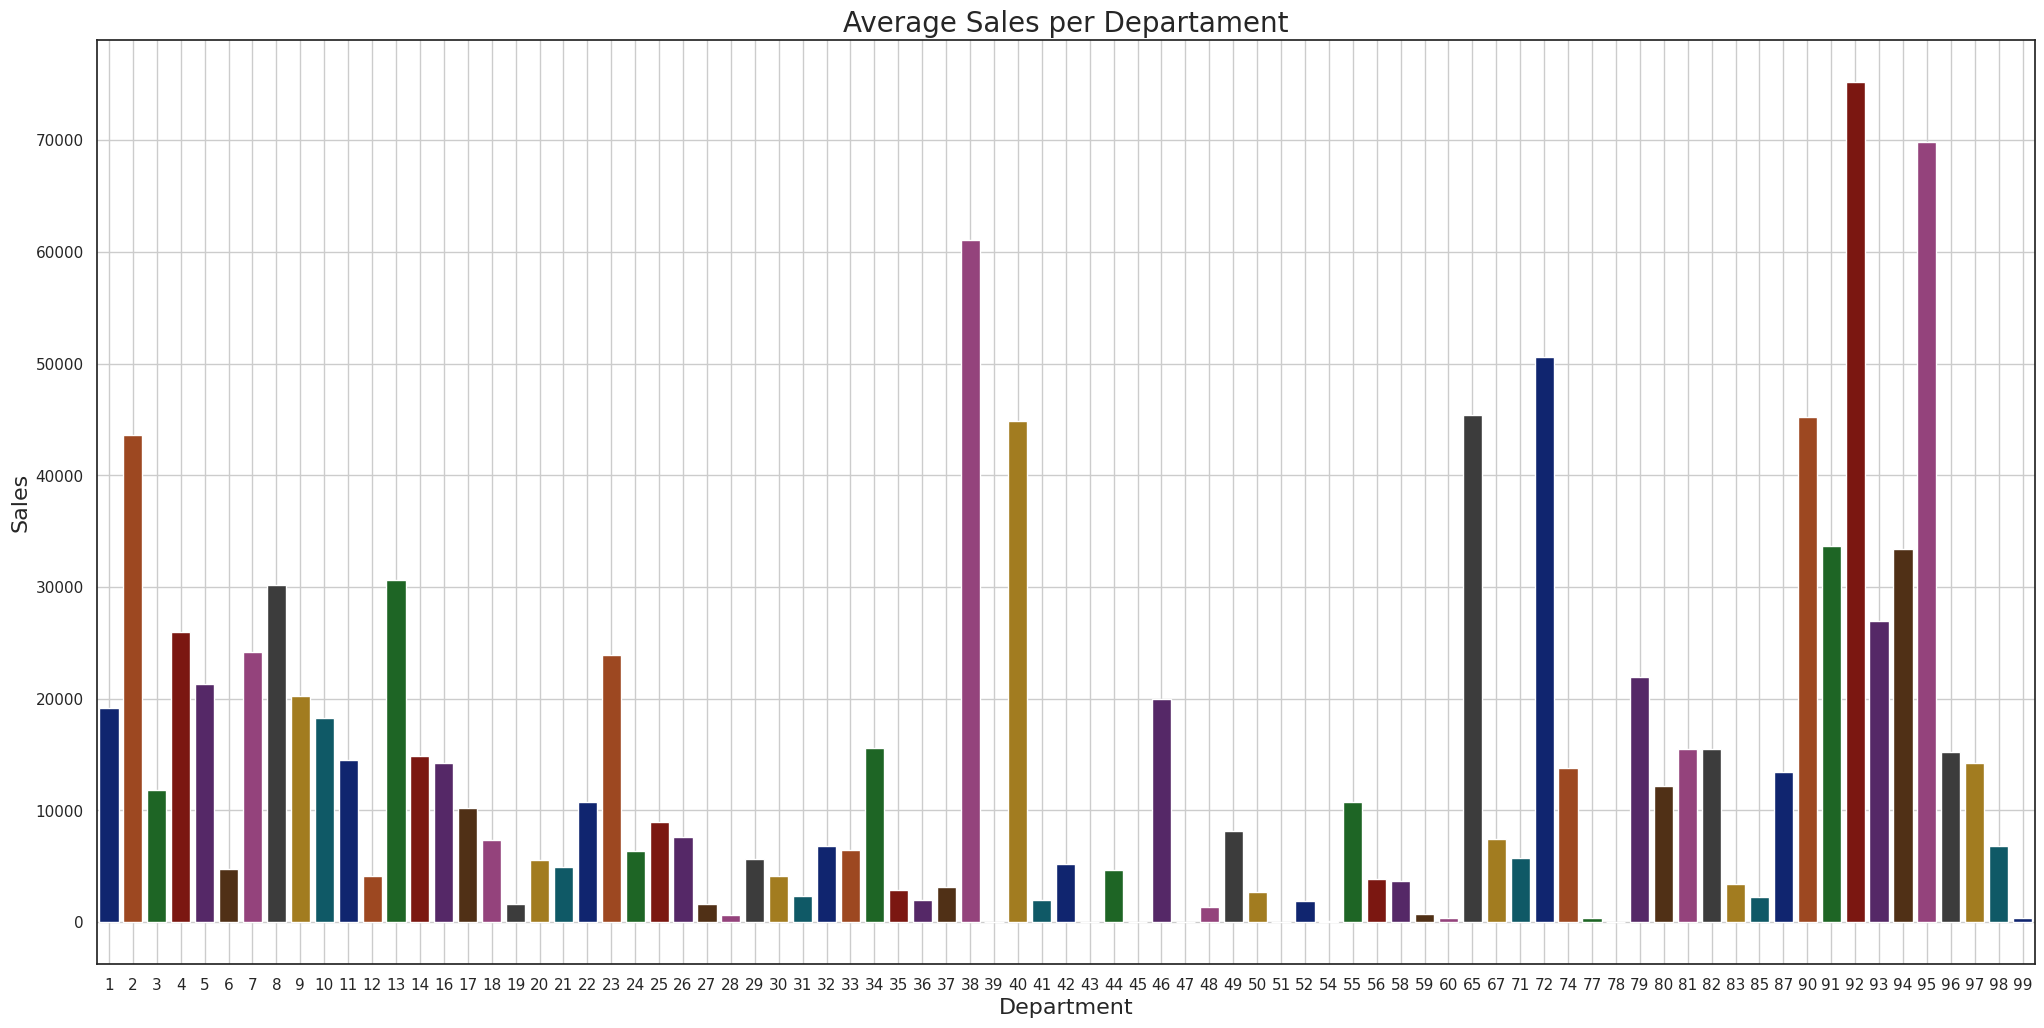

In [128]:
#Average Sales per Department
weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Dept']).mean()
plt.figure(figsize = (25,12))
sns.barplot(x = weekly_sales.index, y = weekly_sales.values, palette ='dark')
plt.grid()
plt.title('Average Sales per Departament', fontsize = 20)
plt.ylabel('Sales', fontsize = 16)
plt.xlabel('Department', fontsize = 16)
plt.show()



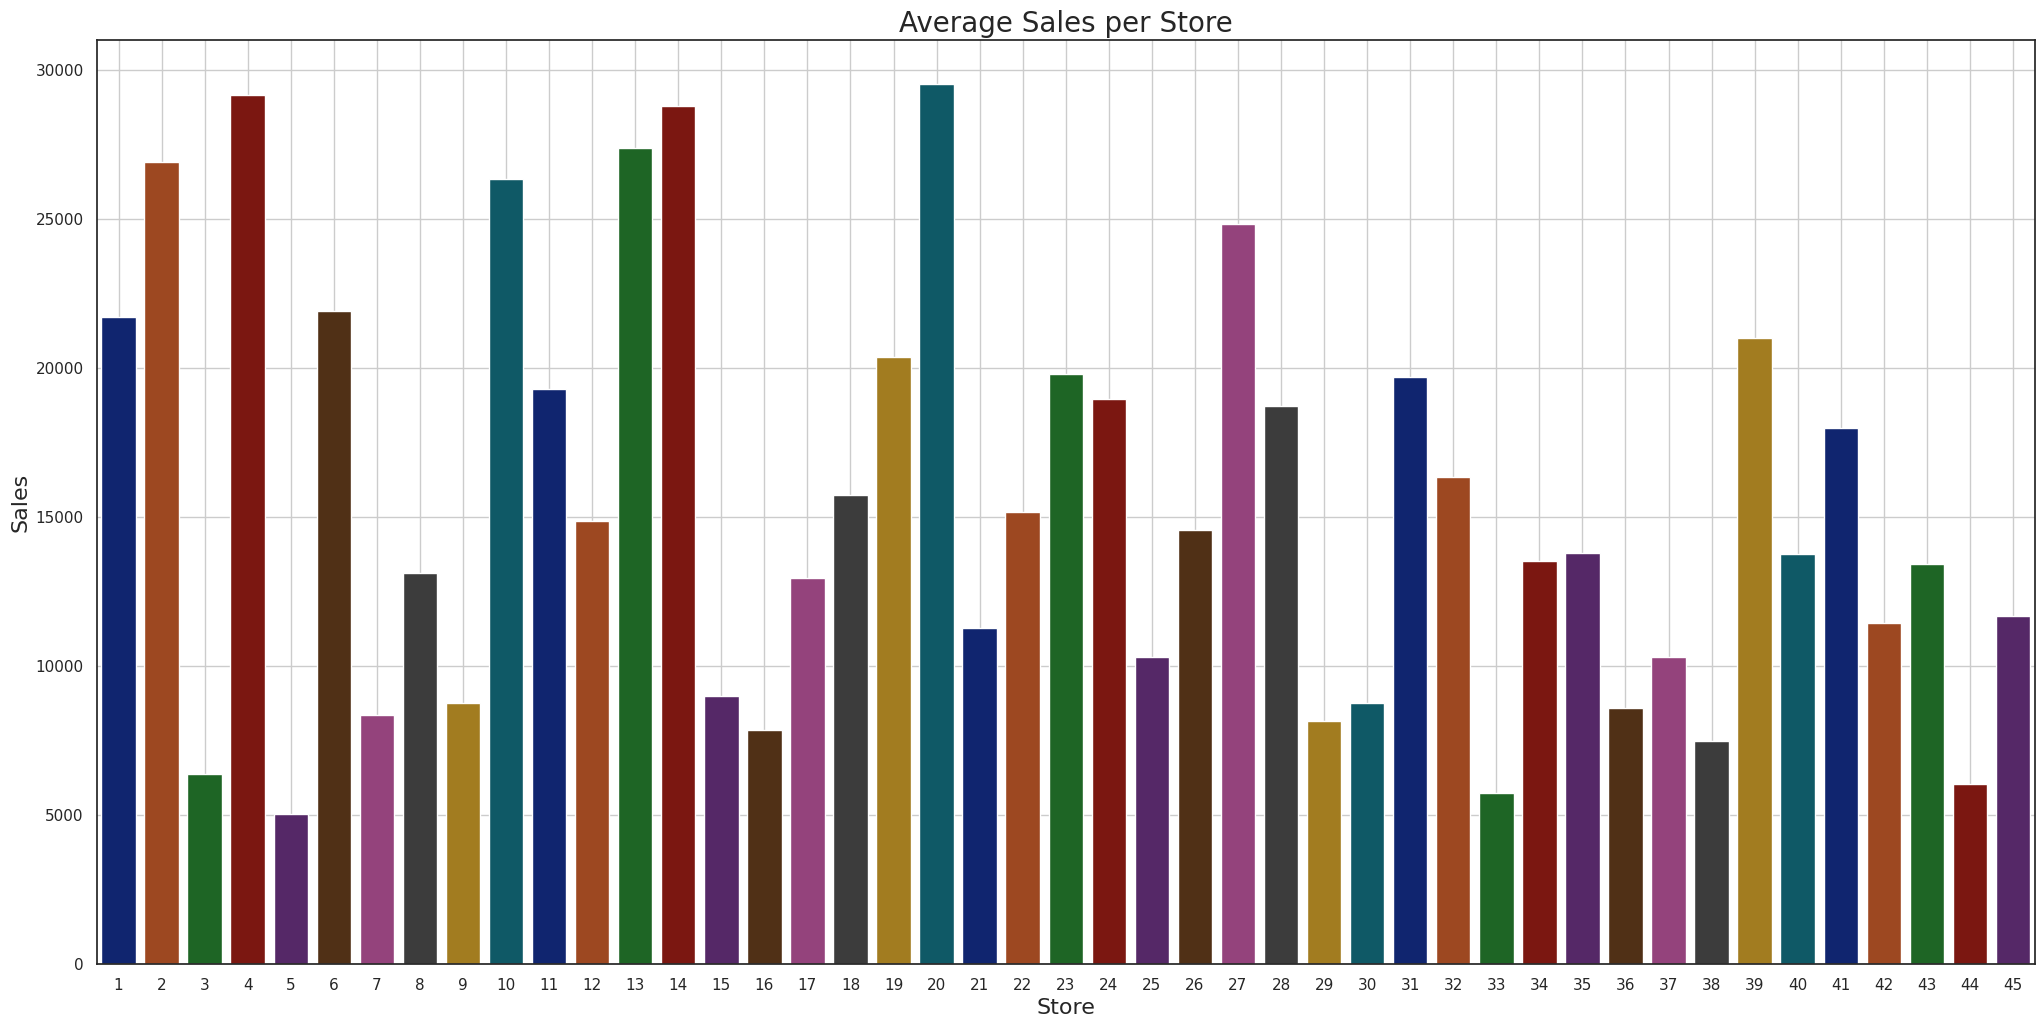

In [129]:
#Average Sales per Store
weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Store']).mean()
plt.figure(figsize = (25,12))
sns.barplot(x = weekly_sales.index, y = weekly_sales.values, palette ='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize = 20)
plt.ylabel('Sales', fontsize = 16)
plt.xlabel('Store', fontsize = 16)
plt.show()

<ipython-input-130-c92108fcb5ce>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-130-c92108fcb5ce>:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



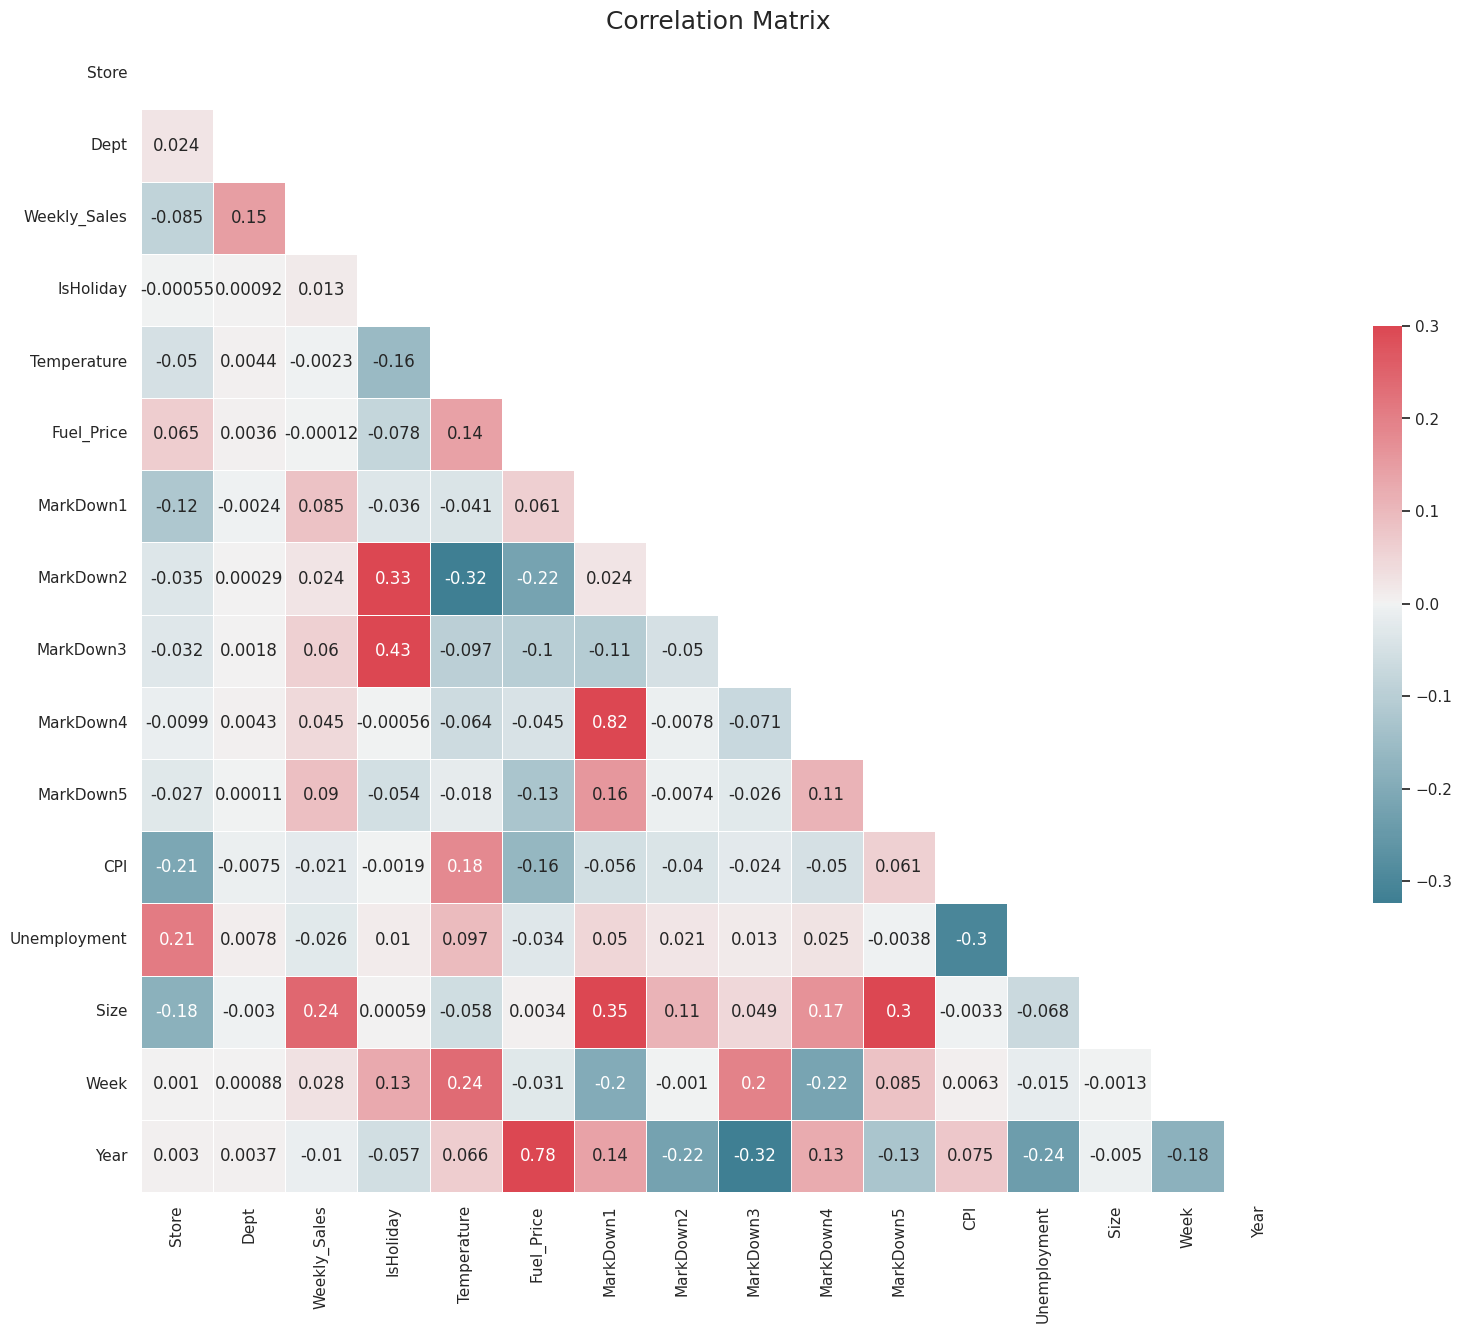

In [130]:
sns.set(style = 'white')

corr = train_merge.corr()

mask = np.triu(np.ones_like(corr, dtype = np.bool))

f,ax = plt.subplots(figsize = (20,15))

cmap = sns.diverging_palette(220,10, as_cmap = True)

plt.title('Correlation Matrix', fontsize = 18)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0, square = True, linewidths= .5, cbar_kws= {'shrink': .5},annot= True )

plt.show()

In [131]:
#Dropping down the variables that have weak correlation
train_merge = train_merge.drop(columns = ['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])
test_merge = test_merge.drop(columns = ['Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

In [132]:
train_merge.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature         CPI  \
0      1     1 2010-02-05      24924.50      False        42.31  211.096358   
1      1     1 2010-02-12      46039.49       True        38.51  211.242170   
2      1     1 2010-02-19      41595.55      False        39.93  211.289143   
3      1     1 2010-02-26      19403.54      False        46.63  211.319643   
4      1     1 2010-03-05      21827.90      False        46.50  211.350143   

   Unemployment Type    Size  Week  Year  
0         8.106    A  151315     5  2010  
1         8.106    A  151315     6  2010  
2         8.106    A  151315     7  2010  
3         8.106    A  151315     8  2010  
4         8.106    A  151315     9  2010

In [133]:
test_merge.head()

Store  Dept       Date  IsHoliday  Temperature         CPI  Unemployment  \
0      1     1 2012-11-02      False        55.32  223.462779         6.573   
1      1     1 2012-11-09      False        61.24  223.481307         6.573   
2      1     1 2012-11-16      False        52.92  223.512911         6.573   
3      1     1 2012-11-23       True        56.23  223.561947         6.573   
4      1     1 2012-11-30      False        52.34  223.610984         6.573   

  Type    Size  Week  Year  
0    A  151315    44  2012  
1    A  151315    45  2012  
2    A  151315    46  2012  
3    A  151315    47  2012  
4    A  151315    48  2012